# Import packages

In [18]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

# Load the data

In [19]:
clean_df,data=read_data('portfolio_data.csv',debug=True)

        Date        AMZN        DPZ         BTC       NFLX
0   5/1/2013  248.229996  51.190983  106.250000  30.415714
1   5/2/2013  252.550003  51.987320   98.099998  30.641428
2   5/3/2013  258.049988  52.446388  112.900002  30.492857
3   5/6/2013  255.720001  53.205257  109.599998  30.098572
4   5/7/2013  257.730011  54.151505  113.199997  29.464285
5   5/8/2013  258.679993  54.385727  112.800003  29.801428
6   5/9/2013  260.160004  54.020340  117.699997  30.915714
7  5/10/2013  263.630005  54.357620  115.639999  31.098572
8  5/13/2013  264.510010  54.573097  111.400002  32.768570
9  5/14/2013  268.329987  55.275757  114.220001  33.424286
----------------------------------------------------
        Date        AMZN
0 2013-05-01  248.229996
1 2013-05-02  252.550003
2 2013-05-03  258.049988
3 2013-05-06  255.720001
4 2013-05-07  257.730011
5 2013-05-08  258.679993
6 2013-05-09  260.160004
7 2013-05-10  263.630005
8 2013-05-13  264.510010
9 2013-05-14  268.329987


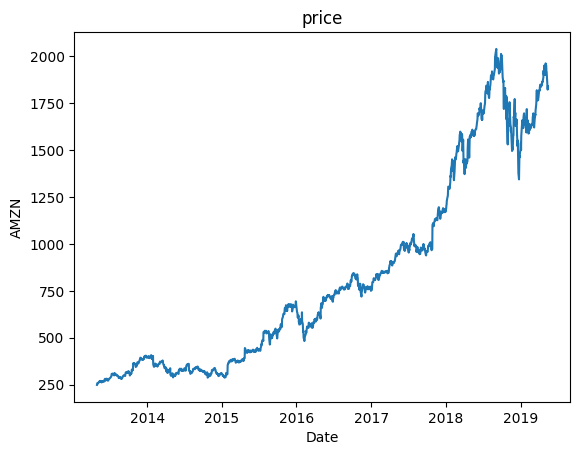

In [20]:
plot_data(clean_df["AMZN"], title="price", x_label="Date", y_label="AMZN")

In [21]:
def prepare_train_test_data(data, time_step_in, time_step_out, test_size=0.2):
    X, Y = create_dataset(data, time_step_in, time_step_out)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

    # Separate scalers for X and Y
    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaler_Y = MinMaxScaler(feature_range=(0,1))
    x_train = scaler_X.fit_transform(X_train)
    y_train = scaler_Y.fit_transform(Y_train)
    x_test = scaler_X.transform(X_test)
    y_test = scaler_Y.transform(Y_test)

    print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test, scaler_X, scaler_Y
x_train, x_test, y_train, y_test, scaler_X, scaler_Y = prepare_train_test_data(data, time_step_in=20, time_step_out=1, test_size=0.2)

x_train shape: (1199, 20), y_train shape: (1199, 1), x_test shape: (300, 20), y_test shape: (300, 1)


In [22]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (300, 20, 1)
X_train shape => (1199, 20, 1)


In [23]:
lstm_model_1=Sequential()
lstm_model_1.add(LSTM(50,return_sequences=True,input_shape=(20,1)))
lstm_model_1.add(LSTM(50,return_sequences=True))
lstm_model_1.add(LSTM(50))
lstm_model_1.add(Dense(1))
lstm_model_1.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.0001), metrics=['mean_absolute_error'])
lstm_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 20, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 20, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history=lstm_model_1.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - val_loss: 0.2017 - val_mean_absolute_error: 0.2017
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - val_loss: 0.0516 - val_mean_absolute_error: 0.0516
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - val_loss: 0.0257 - val_mean_absolute_error: 0.0257
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0208 - val_mean_absolute_error: 0.0208
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - val_loss: 0.0187 - val_mean_absolute_error: 0.0187
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - val_loss: 0.0201 - val_mean_absolute_error: 0.0201
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - v

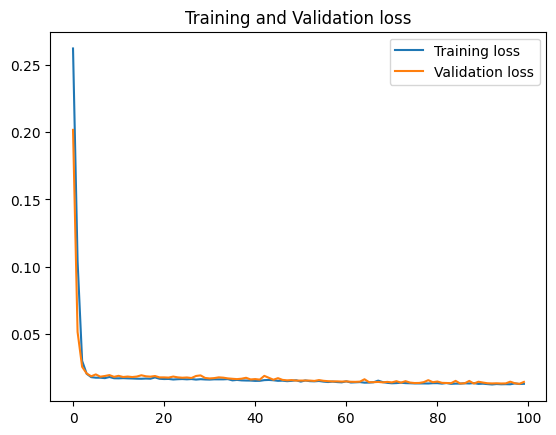

In [25]:
history_plot(history)

In [26]:
result =lstm_model_1.evaluate(x_test, y_test)
y_pred = lstm_model_1.predict(x_test) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [27]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: [0.014519516378641129, 0.014519516378641129]
Test MAPE: 0.10459055949124817
Test Accuracy: 0.8954094405087518


In [28]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 31): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    if len(input_window.shape) == 1:
        input_window = input_window.reshape(-1, 1)
    
    # Reshape input window to 3D for LSTM (1 sample, time_steps, features)
    y_temp = lstm_model_1.predict(input_window.reshape(1, input_window.shape[0], input_window.shape[1]))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0]) 
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0]  

Step 1 ==> Input Window: [[0.91459181]
 [0.93498182]
 [0.91410987]
 [0.91965979]
 [0.9327302 ]
 [0.91190062]
 [0.91401917]
 [0.91152397]
 [0.92218655]
 [0.91219901]
 [0.93828376]
 [0.93713955]
 [0.92455717]
 [0.93709538]
 [0.9542267 ]
 [0.97670675]
 [0.97911428]
 [0.98492491]
 [1.02021476]
 [0.98960769]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction Output (y_temp): [[0.9782314]]
Step 2 ==> Input Window: [[0.93498182]
 [0.91410987]
 [0.91965979]
 [0.9327302 ]
 [0.91190062]
 [0.91401917]
 [0.91152397]
 [0.92218655]
 [0.91219901]
 [0.93828376]
 [0.93713955]
 [0.92455717]
 [0.93709538]
 [0.9542267 ]
 [0.97670675]
 [0.97911428]
 [0.98492491]
 [1.02021476]
 [0.98960769]
 [0.97823137]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction Output (y_temp): [[0.9865522]]
Step 3 ==> Input Window: [[0.91410987]
 [0.91965979]
 [0.9327302 ]
 [0.91190062]
 [0.91401917]
 [0.91152397]
 [0.92218655]
 [0.91219901]
 [0.93828376]
 [0.93713955]
 [0.92455717]
 [0.93709538]
 [0.9542267 ]
 [0.97670675]
 [0.979

In [29]:
num_samples = len(all_predictions)
all_predictions_array = np.array(all_predictions) 
all_predictions_reshaped = all_predictions_array.reshape(num_samples, 1)  
y_next_30 = scaler_Y.inverse_transform(all_predictions_reshaped)
y_next_30 = np.round(y_next_30)

In [30]:
x_train= x_train.reshape(x_train.shape[0], -1)
x_test= x_test.reshape(x_test.shape[0], -1)

print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (300, 20)
X_train shape => (1199, 20)


In [31]:
x_test=scaler_X.inverse_transform(x_test)
x_train=scaler_X.inverse_transform(x_train)

In [32]:
x_test[-1]

array([1886.52002 , 1898.52002 , 1886.300049, 1896.199951, 1919.650024,
       1882.619995, 1886.52002 , 1882.219971, 1876.709961, 1883.420044,
       1904.900024, 1902.900024, 1905.390015, 1927.680054, 1932.819946,
       1998.099976, 2002.380005, 2012.709961, 2039.51001 , 1994.819946])

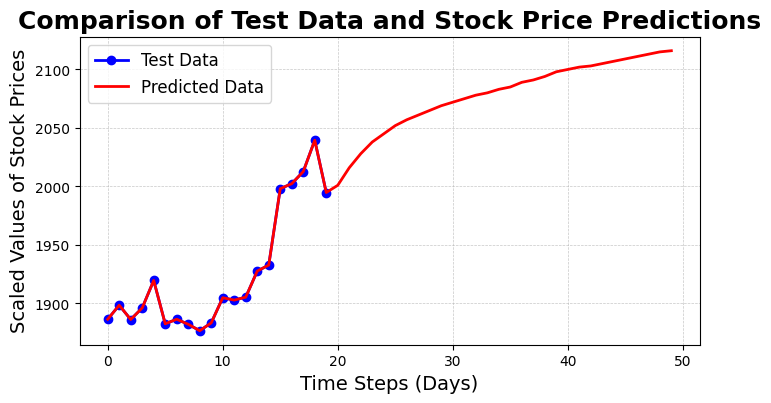

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(x_test[-1], label='Test Data', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red', linewidth=2, markersize=8)
plt.title('Comparison of Test Data and Stock Price Predictions', fontsize=18, fontweight='bold')
plt.xlabel('Time Steps (Days)', fontsize=14)
plt.ylabel('Scaled Values of Stock Prices', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [34]:
last_date = clean_df.index[-1]
last_20_days=np.round(x_test[-1])
print(f" the last 20 days till {last_date}: {last_20_days}\npredicted  for 30 days: {y_next_30.flatten().tolist()}")

 the last 20 days till 2019-05-14 00:00:00: [1887. 1899. 1886. 1896. 1920. 1883. 1887. 1882. 1877. 1883. 1905. 1903.
 1905. 1928. 1933. 1998. 2002. 2013. 2040. 1995.]
predicted  for 30 days: [2001.0, 2016.0, 2028.0, 2038.0, 2045.0, 2052.0, 2057.0, 2061.0, 2065.0, 2069.0, 2072.0, 2075.0, 2078.0, 2080.0, 2083.0, 2085.0, 2089.0, 2091.0, 2094.0, 2098.0, 2100.0, 2102.0, 2103.0, 2105.0, 2107.0, 2109.0, 2111.0, 2113.0, 2115.0, 2116.0]
